# colchecker.ipynb

The col_checker function takes 5 randomly generated columns in the range (0,8192) and line plots all pixel values along that column in order to identify which columns are ideal or poor choices to use as reference values.

For more information, see convertfits.md

Author : Darren Hunt, University of Washington

Edited by : Jennifer Sobeck, University of Washington

In [1]:
import numpy as np
from astropy.io import fits  # open and read fits data
import matplotlib.pyplot as plt

In [2]:
def col_checker(f="asRaw-24960049.fits"):
    """Line plots all values along 5 randomly selected columns in a flat image for visual comparison.
    
    Parameters
    ----------
    f : str, optional
        Name of flat file. Default is the raw master flat, exp 24960049
    """
    
    flat = fits.getdata(f)  # intensity vals

    plt.style.use('ggplot')
    fig, ax = plt.subplots(1,1,figsize=(18,12))
    ax.set_title("Pixel values (5 random columns), "+f.rsplit('.',1)[0],fontsize=20)
    ax.set_xlabel("Pixel",fontsize=16), ax.set_ylabel("Intensity",fontsize=16)
    ax.tick_params(labelsize=14)
    
    x = np.arange(0,2048,1)  # number of pix in a single col
    #y = [[(np.random.randint(0,8192,size=5))]]
    y = []
    for i in range(5):
        r = np.random.randint(0,8192,size=1)
        data = flat[0:2048, r]  # grab pixel values for each random column
        y.append([r,data])
    
    ax.scatter(x,y[0][1],color='red',label=y[0][0])
    ax.scatter(x,y[1][1],color='blue',alpha=0.7,label=y[1][0])
    ax.scatter(x,y[2][1],color='green',alpha=0.6,label=y[2][0])
    ax.scatter(x,y[3][1],color='orange',alpha=0.5,label=y[3][0])
    ax.scatter(x,y[4][1],color='magenta',alpha=0.4,label=y[4][0])
    
    ax.legend(loc='upper left',title="column no.",fontsize=14)
    plt.show()

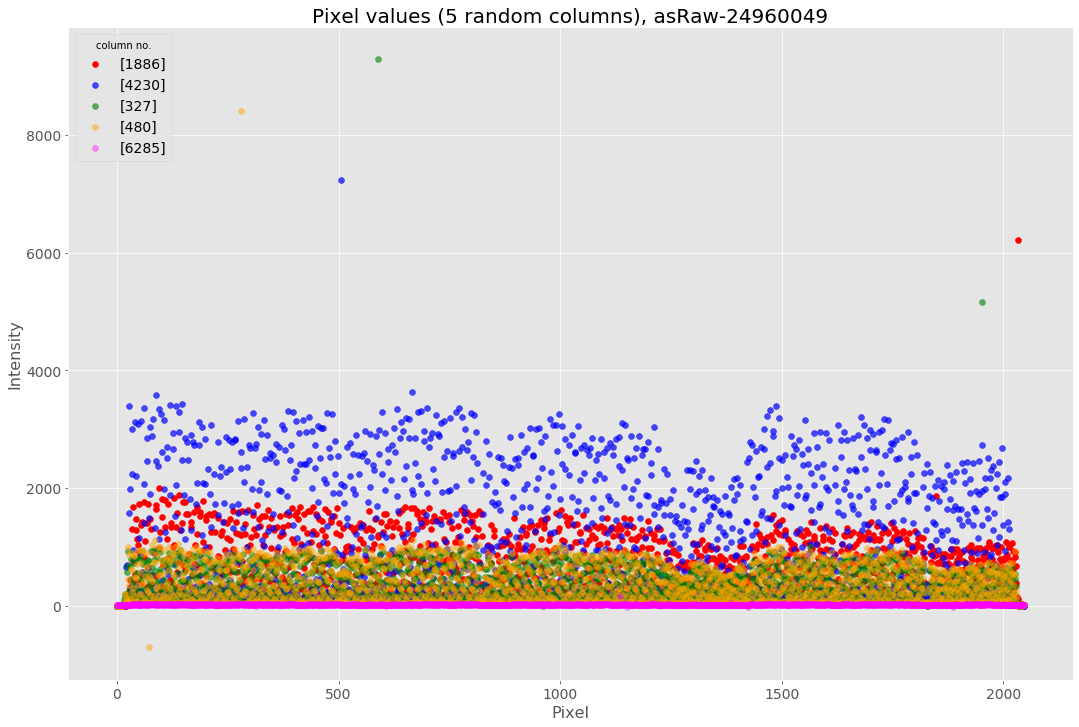

In [3]:
col_checker()

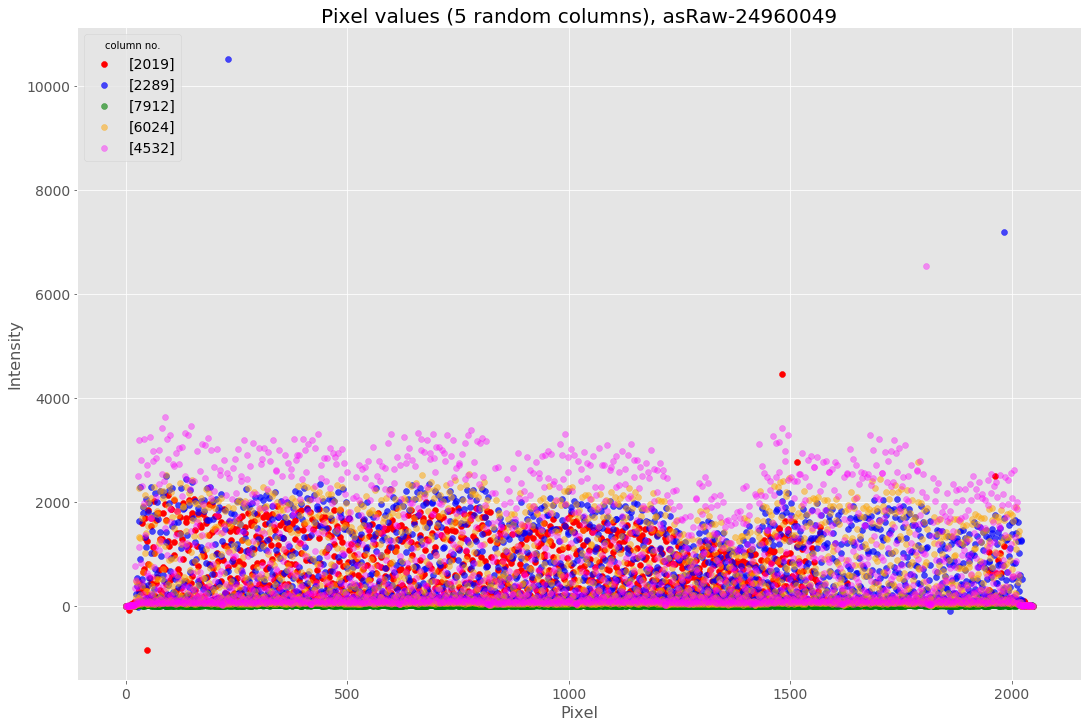

In [4]:
col_checker()

The ouput graphs when drawing randoming columns across the reference flat are highly variable. Some columns display clear outliers (pixel intensity greater than 10,000 where baseline is around ~2000) or negative intensities. Columns near chip gaps or detector edges are expected to have atypical intensities. Other columns with significant spikes or dips that are consistently outliers are potential areas to examine at a later point (i.e. for hot pixels).